# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
pip install kaggle --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Displaying the model's summary**

In [25]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 128)         7385

**Training the convnet on MNIST images**

In [26]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.1571 - accuracy: 0.9512
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0436 - accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0182 - accuracy: 0.9944


**Evaluating the convnet**

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9915
Test accuracy: 0.992


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [28]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
model_no_max_pool.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_4 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [30]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"elychang","key":"165139a7966d0b3fc94ce5c519e813e7"}'}

In [31]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [32]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip -qq test1.zip

**Copying images to training, validation, and test directories**

In [40]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [42]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [43]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [44]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [45]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [46]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [47]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [48]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [49]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [50]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 81ms/step - loss: 0.7356 - accuracy: 0.5280 - val_loss: 0.7183 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6908 - accuracy: 0.5480 - val_loss: 0.6615 - val_accuracy: 0.6050
Epoch 3/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6494 - accuracy: 0.6335 - val_loss: 0.7682 - val_accuracy: 0.6250
Epoch 4/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6069 - accuracy: 0.6800 - val_loss: 0.9035 - val_accuracy: 0.5470
Epoch 5/30
63/63 [==============================] - 5s 71ms/step - loss: 0.5832 - accuracy: 0.7010 - val_loss: 0.5913 - val_accuracy: 0.6710
Epoch 6/30
63/63 [==============================] - 5s 71ms/step - loss: 0.5413 - accuracy: 0.7260 - val_loss: 0.5833 - val_accuracy: 0.7020
Epoch 7/30
63/63 [==============================] - 5s 69ms/step - loss: 0.4984 - accuracy: 0.7795 - val_loss: 0.5700 - val_accuracy: 0.7120
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

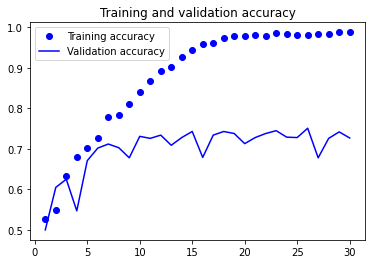

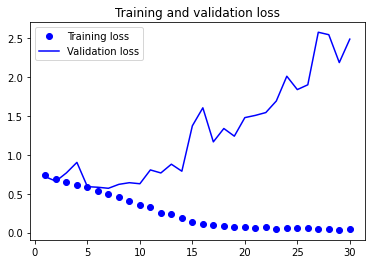

In [51]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [52]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 72ms/step - loss: 0.6327 - accuracy: 0.7105
Test accuracy: 0.711


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [53]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

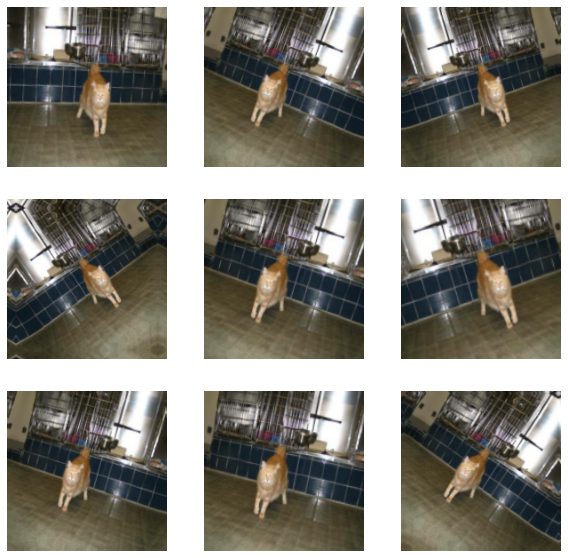

In [54]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [55]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [56]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 98ms/step - loss: 0.7202 - accuracy: 0.5130 - val_loss: 0.6866 - val_accuracy: 0.5410
Epoch 2/100
63/63 [==============================] - 6s 92ms/step - loss: 0.6960 - accuracy: 0.5305 - val_loss: 0.6862 - val_accuracy: 0.5980
Epoch 3/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6986 - accuracy: 0.5730 - val_loss: 0.6641 - val_accuracy: 0.6130
Epoch 4/100
63/63 [==============================] - 6s 93ms/step - loss: 0.6867 - accuracy: 0.6065 - val_loss: 0.7640 - val_accuracy: 0.5260
Epoch 5/100
63/63 [==============================] - 6s 98ms/step - loss: 0.6427 - accuracy: 0.6445 - val_loss: 0.6092 - val_accuracy: 0.6560
Epoch 6/100
63/63 [==============================] - 6s 92ms/step - loss: 0.6224 - accuracy: 0.6625 - val_loss: 0.6135 - val_accuracy: 0.6430
Epoch 7/100
63/63 [==============================] - 8s 117ms/step - loss: 0.6049 - accuracy: 0.6665 - val_loss: 0.6592 - val_accuracy: 0.6560
Epoc

**Evaluating the model on the test set**

In [57]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 36ms/step - loss: 0.4390 - accuracy: 0.8130
Test accuracy: 0.813


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [58]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [59]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [60]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 18ms/step


In [61]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [62]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 24.3830 - accuracy: 0.9225 - val_loss: 14.6468 - val_accuracy: 0.9220
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.7985 - accuracy: 0.9755 - val_loss: 7.4279 - val_accuracy: 0.9580
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7664 - accuracy: 0.9835 - val_loss: 29.1861 - val_accuracy: 0.8950
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 2.9260 - accuracy: 0.9840 - val_loss: 5.3886 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.8661 - accuracy: 0.9885 - val_loss: 5.5231 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.9960 - val_loss: 9.4374 - val_accuracy: 0.9610
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2576 - accuracy: 0.9975 - val_loss: 3.7775 - val_accuracy: 0.9730
Epoch 8/20
63/63 

**Plotting the results**

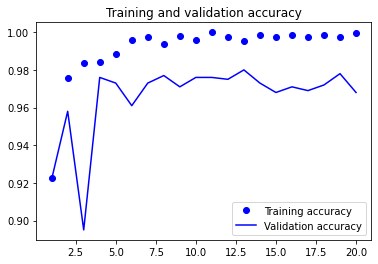

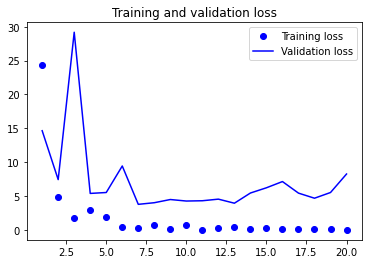

In [63]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [64]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [65]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [66]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [67]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [68]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 195ms/step - loss: 20.1744 - accuracy: 0.8925 - val_loss: 9.7662 - val_accuracy: 0.9500
Epoch 2/50
63/63 [==============================] - 13s 197ms/step - loss: 7.5270 - accuracy: 0.9440 - val_loss: 4.5064 - val_accuracy: 0.9700
Epoch 3/50
63/63 [==============================] - 13s 196ms/step - loss: 6.0309 - accuracy: 0.9525 - val_loss: 3.8715 - val_accuracy: 0.9750
Epoch 4/50
63/63 [==============================] - 13s 210ms/step - loss: 4.5276 - accuracy: 0.9680 - val_loss: 3.2764 - val_accuracy: 0.9820
Epoch 5/50
63/63 [==============================] - 12s 193ms/step - loss: 5.4057 - accuracy: 0.9610 - val_loss: 3.9991 - val_accuracy: 0.9710
Epoch 6/50
63/63 [==============================] - 12s 193ms/step - loss: 3.2853 - accuracy: 0.9710 - val_loss: 3.6960 - val_accuracy: 0.9750
Epoch 7/50
63/63 [==============================] - 13s 201ms/step - loss: 2.7070 - accuracy: 0.9730 - val_loss: 3.9011 - val_accuracy: 0.979

**Evaluating the model on the test set**

In [69]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 109ms/step - loss: 1.8601 - accuracy: 0.9775
Test accuracy: 0.978


### Fine-tuning a pretrained model

In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [71]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [72]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 220ms/step - loss: 0.3383 - accuracy: 0.9905 - val_loss: 1.4629 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - 14s 218ms/step - loss: 0.2801 - accuracy: 0.9905 - val_loss: 1.2230 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 14s 212ms/step - loss: 0.3087 - accuracy: 0.9945 - val_loss: 1.7561 - val_accuracy: 0.9810
Epoch 4/30
63/63 [==============================] - 14s 213ms/step - loss: 0.5159 - accuracy: 0.9865 - val_loss: 1.6422 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 14s 214ms/step - loss: 0.1121 - accuracy: 0.9935 - val_loss: 1.5375 - val_accuracy: 0.9790
Epoch 6/30
63/63 [==============================] - 14s 217ms/step - loss: 0.3966 - accuracy: 0.9910 - val_loss: 1.1483 - val_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 14s 221ms/step - loss: 0.2288 - accuracy: 0.9915 - val_loss: 1.1313 - val_accuracy: 0.9860

In [73]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 112ms/step - loss: 1.5208 - accuracy: 0.9785
Test accuracy: 0.979


## Summary

這次跑貓跟狗的影像學習跑很久，知道了基本的影像學習知識。